In [1]:
import pandas as pd

weather_data = pd.read_csv("../Data/combined_weatherdata_2022.csv", header = 0, sep=',')
weather_data.head()

cutoff_rain_day = 0.0002

weather_data["bool_rainday"] = weather_data["LC_DAILYRAIN"] > cutoff_rain_day

In [2]:
data_noise = pd.read_csv('../Data/combined_noisedata_2022.csv', header=0, sep=',', parse_dates=["result_date"])
data_noise.head()

,index,result_date,description,lamax,laeq,lceq,lcpeak,result_month,result_day
0,0,2022-01-01,MP 03: Naamsestraat 62 Taste,51.665242,49.992637,59.345285,71.190601,1.0,1.0
1,1,2022-01-01,MP 05: Calvariekapel KU Leuven,48.747476,46.504067,54.970850,67.557919,1.0,1.0
2,2,2022-01-01,MP 06: Parkstraat 2 La Filosovia,48.270005,46.007220,54.286131,67.321329,1.0,1.0
3,3,2022-01-01,MP 07: Naamsestraat 81,45.908501,44.373056,55.526650,66.988945,1.0,1.0
4,4,2022-01-02,MP 03: Naamsestraat 62 Taste,51.407297,50.094018,59.816366,71.545452,1.0,2.0


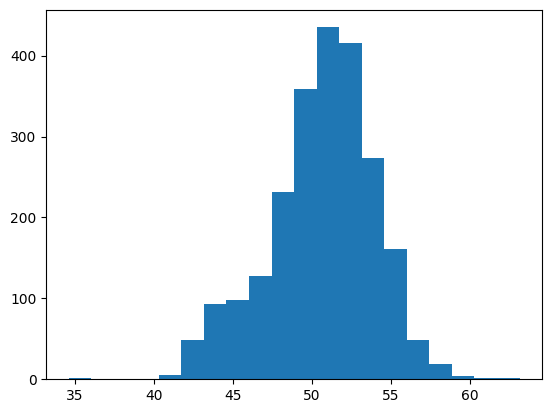

In [6]:
import matplotlib.pyplot as plt

number_of_bins = 20

plt.hist(data_noise["laeq"], bins=number_of_bins)
plt.show()

In [17]:
average_noise = data_noise.groupby('result_month')['laeq'].mean()

mean_average_noise = average_noise.mean()
std_average_noise = average_noise.std()

average_noise_std = (average_noise-mean_average_noise)/std_average_noise

import plotly.graph_objects as go

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

fig = go.Figure(data=go.Bar(x=months, y=average_noise_std))

# Set the color of bars based on the value
fig.update_traces(marker=dict(color=['red' if val < 0 else 'green' for val in average_noise_std]))

fig.update_layout(
    title="Average noise level per month (standardized data)",
    xaxis_title="Month",
    yaxis_title="Average noise level (Laeq)"
)

fig.show()

#red green effect exagerated

In [41]:
average_noise = data_noise.groupby('result_month')['laeq'].mean()

import plotly.graph_objects as go

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

fig = go.Figure()

# Add the bar trace with showlegend=False
fig.add_trace(go.Bar(x=months, y=average_noise, showlegend=False))

# Add the black line for the average with showlegend=True
fig.add_trace(go.Scatter(x=[months[0], months[-1]], y=[average_noise.mean()] * 2, mode='lines',
                         line=dict(color='black', width=2), name='Average Line', showlegend=True))

fig.update_traces(marker=dict(color=['red' if val < 0 else 'green' for val in average_noise_std]))

fig.update_layout(
    title="Average noise level per month (absolute value of the data)",
    xaxis_title="Month",
    yaxis_title="Average noise level (Laeq)",
    legend=dict(
        title="Legend",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig.show()